In [1]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
%matplotlib inline

Num GPUs Available:  1


In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
image_gen = ImageDataGenerator(rotation_range=30, #rotate the image 30 degrees
                              width_shift_range=0.1, #shift the pic width by a max of 10%
                              height_shift_range = 0.1, #shift the pic height by a max of 10%
                              rescale = 1/255, #rescale the image by normalizing it
                              shear_range = 0.2, #Shear means cutting away part of the image(max 20%)
                              zoom_range=0.2, #Zoom in by a max of 20%
                               horizontal_flip=True, #allow horizontal flipping
                               fill_mode="nearest" #Fill in the missing pixels with the nearest filled value
                              )

In [4]:
image_shape=(100,100,3)

In [5]:
#Creating the model
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [6]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape = image_shape, activation="relu",))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = image_shape, activation="relu",))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = image_shape, activation="relu",))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(12))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

In [8]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('E:/AI Projects/Image Classification/Dataset/Train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 6076 images belonging to 12 classes.


In [9]:
test_image_gen = image_gen.flow_from_directory('E:/AI Projects/Image Classification/Dataset/Test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 2039 images belonging to 12 classes.


In [10]:
train_image_gen.class_indices

{'Apple Braeburn': 0,
 'Apricot': 1,
 'Avocado': 2,
 'Avocado ripe': 3,
 'Banana': 4,
 'Banana Red': 5,
 'Cactus fruit': 6,
 'Cantaloupe 1': 7,
 'Cantaloupe 2': 8,
 'Carambula': 9,
 'Cherry 1': 10,
 'Cherry 2': 11}

In [11]:
import warnings
warnings.filterwarnings('ignore')


In [12]:
from PIL import Image

In [13]:
results = model.fit_generator(train_image_gen, epochs = 5,
                             steps_per_epoch = 250,
                             validation_data = test_image_gen,
                             validation_steps = 12)

Epoch 1/5
250/250 [==============================] - 27s 109ms/step - loss: 1.2426 - accuracy: 0.5450 - val_loss: 0.6351 - val_accuracy: 0.8229
Epoch 2/5
250/250 [==============================] - 19s 78ms/step - loss: 0.4913 - accuracy: 0.8278 - val_loss: 0.1845 - val_accuracy: 0.9167
Epoch 3/5
250/250 [==============================] - 11s 45ms/step - loss: 0.2787 - accuracy: 0.8879 - val_loss: 0.1384 - val_accuracy: 0.9115
Epoch 4/5
250/250 [==============================] - 11s 45ms/step - loss: 0.2544 - accuracy: 0.9075 - val_loss: 0.1464 - val_accuracy: 0.8698
Epoch 5/5
250/250 [==============================] - 11s 45ms/step - loss: 0.1890 - accuracy: 0.9262 - val_loss: 0.1081 - val_accuracy: 0.9583


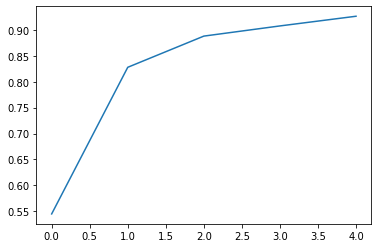

In [14]:
plt.plot(results.history['accuracy'])

In [15]:
model.save('fruit_classifier_multiple.h5')